# Phishing Domain Detection
Phishing is a type of fraud in which an attacker impersonates a reputable company or person in order to get sensitive information such as login credentials or account information via email or other communication channels. Phishing is popular among attackers because it is easier to convince someone to click a malicious link that appears to be legitimate than to gain access to a computer's protections. The main goal is to identify or predict whether the domain is real or malicious.

**Approach:-** 
1. Data Collection 
2. Data Exploration - EDA
3. Data Cleaning
4. Feature Engineering
5. Model Building 
6. Model Evalution
6. Model Deployment

**For Feature Engineering:-**
1. URL-Based Features
2. Domain-Based Features
3. Directory-Based Features
4. File-Based Features
5. Parameters-Based Features
6. External services Based Features

Dataset Link: - https://data.mendeley.com/datasets/72ptz43s9v/1

Paper Link: - https://www.sciencedirect.com/science/article/pii/S2352340920313202

In [86]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [87]:
data = pd.read_csv('dataset_full.csv')
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [88]:
data.shape

(88647, 112)

In [89]:
data['qty_and_params'].value_counts()

-1     81225
 0      3854
 2      1298
 1      1083
 3       249
 10      211
 5       205
 4       131
 6       127
 9        95
 8        74
 7        35
 11       23
 13       16
 12        9
 14        5
 15        4
 19        2
 22        1
Name: qty_and_params, dtype: int64

In [90]:
data.isna().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [8]:
data['phishing'].value_counts()

0    58000
1    30647
Name: phishing, dtype: int64

In [9]:
idx = data['phishing'].value_counts().index
vals = data['phishing'].value_counts().values

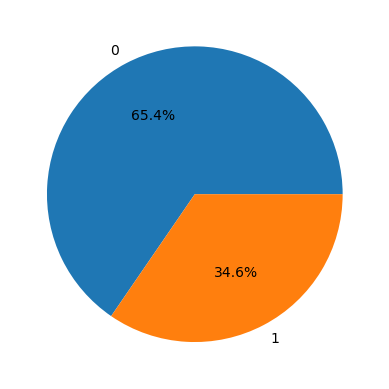

In [10]:
plt.pie(x=vals,labels=idx,autopct='%2.1f%%');

In [10]:
data.nunique()

qty_dot_url             23
qty_hyphen_url          30
qty_underline_url       22
qty_slash_url           25
qty_questionmark_url     6
                        ..
qty_redirects           15
url_google_index         3
domain_google_index      3
url_shortened            2
phishing                 2
Length: 112, dtype: int64

In [11]:
data['qty_dot_url'].unique()

array([ 3,  5,  2,  4,  1,  6,  9,  7,  8, 10, 12, 15, 11, 14, 18, 16, 20,
       13, 17, 23, 24, 19, 22], dtype=int64)

In [12]:
data['qty_dot_url'].value_counts()

2     53649
1     15885
3     13205
4      3593
5      1008
6       454
7       217
14      135
8       120
15       86
9        64
10       48
16       44
13       37
12       33
11       32
17       22
18        6
20        3
22        3
23        1
24        1
19        1
Name: qty_dot_url, dtype: int64

In [13]:
data['qty_hyphen_url'].unique()

array([ 0,  1,  2,  4,  3,  6,  5,  8,  7, 12, 10,  9, 19, 11, 14, 17, 15,
       18, 13, 20, 26, 25, 35, 23, 34, 24, 21, 31, 16, 27], dtype=int64)

In [14]:
index = data['qty_hyphen_url'].value_counts()[:10].index
values = data['qty_hyphen_url'].value_counts()[:10].values

<AxesSubplot:>

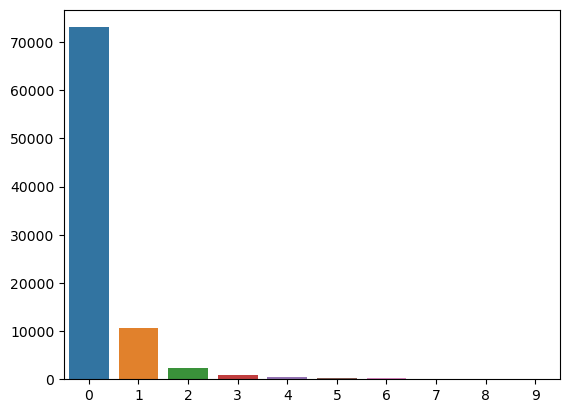

In [17]:
sns.barplot(x = index, y = values)

In [15]:
data['qty_questionmark_directory'].unique()

array([ 0, -1], dtype=int64)

In [93]:
data['qty_and_directory'].unique() # numver of & in directory 

array([ 0,  1,  5,  2, 19, 17,  4, 12, 26,  3,  7, 13, 11], dtype=int64)

In [91]:
data[data<0]=0  # Replace negative value with 0

In [95]:
data['qty_questionmark_directory'].value_counts()

0    88647
Name: qty_questionmark_directory, dtype: int64

In [18]:
data['qty_and_directory'].unique()

array([ 0,  1,  5,  2, 19, 17,  4, 12, 26,  3,  7, 13, 11], dtype=int64)

### Splitting the dataset

In [19]:
X = data.drop('phishing',axis=1)
y = data['phishing']

In [20]:
# feature scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

In [21]:
df = pd.DataFrame(X_scale, columns=X.columns)
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,0.086957,0.0,0.000000,0.022727,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.041667,0.1,0.00,0.001475,0.0,0.000000,0.0,0.0,0.0
1,0.173913,0.0,0.047619,0.068182,0.0,0.130435,0.0,0.076923,0.0,0.0,...,0.006645,0.041667,0.1,0.05,0.015774,1.0,0.000000,0.0,0.0,0.0
2,0.043478,0.0,0.000000,0.022727,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.041667,0.1,0.15,0.000974,1.0,0.000000,0.0,0.0,0.0
3,0.130435,0.0,0.095238,0.113636,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.041667,0.1,0.00,0.000483,1.0,0.000000,0.0,0.0,0.0
4,0.043478,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.013555,0.041667,0.1,0.05,0.005947,0.0,0.058824,0.0,0.0,0.0


## Model Building

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size=0.30,random_state=2)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((62052, 111), (26595, 111), (62052,), (26595,))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


### Logistic Regression

In [25]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [26]:
print("Tranning Accuracy: ",log.score(X_train,y_train))
print("Test Accuracy:", log.score(X_test,y_test))

Tranning Accuracy:  0.9189228389093019
Test Accuracy: 0.9205489753713104


In [27]:
log_acc = log.score(X_test,y_test)
log_acc

0.9205489753713104

In [28]:
log_pred = log.predict(X_test)
log_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [29]:
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report

log_f1_scr = f1_score(y_test,log_pred)
log_recall_scr = recall_score(y_test,log_pred)
log_precision_scr = precision_score(y_test,log_pred)

print(log_f1_scr,log_recall_scr,log_precision_scr)

print(classification_report(y_test,log_pred))

0.8819487122185599 0.8562594922976785 0.9092270475751641
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     17377
           1       0.91      0.86      0.88      9218

    accuracy                           0.92     26595
   macro avg       0.92      0.91      0.91     26595
weighted avg       0.92      0.92      0.92     26595



### Naive Bayes 

In [30]:
naive = GaussianNB()
naive.fit(X_train,y_train)

GaussianNB()

In [31]:
print("Tranning Accuracy: ",naive.score(X_train,y_train))
print("Testing Accuracy: ",naive.score(X_test,y_test))

Tranning Accuracy:  0.7338361374331206
Testing Accuracy:  0.7311148712163941


In [32]:
naive_acc = naive.score(X_test,y_test)
naive_acc

0.7311148712163941

In [33]:
naive_pred = naive.predict(X_test)
naive_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report

naive_f1_scr = f1_score(y_test,naive_pred)
naive_recall_scr = recall_score(y_test,naive_pred)
naive_precision_scr = precision_score(y_test,naive_pred)

print(naive_f1_scr,naive_recall_scr,naive_precision_scr)

print(classification_report(y_test,naive_pred))

0.3829493485201484 0.2407246691256238 0.9358920286798819
              precision    recall  f1-score   support

           0       0.71      0.99      0.83     17377
           1       0.94      0.24      0.38      9218

    accuracy                           0.73     26595
   macro avg       0.82      0.62      0.61     26595
weighted avg       0.79      0.73      0.67     26595



### KNN 

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
print("Tranning Accuracy: ",knn.score(X_train,y_train))
print("Testing Accuracy: ",knn.score(X_test,y_test))

Tranning Accuracy:  0.9661090698124154
Testing Accuracy:  0.9519458544839255


In [37]:
knn_acc = knn.score(X_test,y_test)
knn_acc

0.9519458544839255

In [38]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [39]:
knn_f1_scr = f1_score(y_test,knn_pred)
knn_recall_scr = recall_score(y_test,knn_pred)
knn_precision_scr = precision_score(y_test,knn_pred)

print(knn_f1_scr,knn_recall_scr,knn_precision_scr)

print(classification_report(y_test,knn_pred))

0.9300569176882661 0.9217834671295292 0.9384802297327148
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17377
           1       0.94      0.92      0.93      9218

    accuracy                           0.95     26595
   macro avg       0.95      0.94      0.95     26595
weighted avg       0.95      0.95      0.95     26595



### Decision Tree

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
print("Tranning Accuracy: ",dt.score(X_train,y_train))
print("Testing Accuracy: ",dt.score(X_test,y_test))

Tranning Accuracy:  0.9999033069038871
Testing Accuracy:  0.952923481857492


In [42]:
dt_acc= dt.score(X_test,y_test)
dt_acc

0.952923481857492

In [43]:
dt_pred = dt.predict(X_test)
dt_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [44]:
dt_f1_scr = f1_score(y_test,dt_pred)
dt_recall_scr = recall_score(y_test,dt_pred)
dt_precision_scr = precision_score(y_test,dt_pred)

print(dt_f1_scr,dt_recall_scr,dt_precision_scr)

print(classification_report(y_test,dt_pred))

0.9321114846545927 0.932414840529399 0.9318083261058109
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17377
           1       0.93      0.93      0.93      9218

    accuracy                           0.95     26595
   macro avg       0.95      0.95      0.95     26595
weighted avg       0.95      0.95      0.95     26595



### Random Forest

In [45]:
Rf = RandomForestClassifier()
Rf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
print("Tranning Accuracy: ",Rf.score(X_train,y_train))
print("Testing Accuracy: ",Rf.score(X_test,y_test))

Tranning Accuracy:  0.9999033069038871
Testing Accuracy:  0.9708967851099831


In [47]:
Rf_acc = Rf.score(X_test,y_test)
Rf_acc

0.9708967851099831

In [48]:
Rf_pred = Rf.predict(X_test)
Rf_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [49]:
rf_f1_scr = f1_score(y_test,Rf_pred)
rf_recall_scr = recall_score(y_test,Rf_pred)
rf_precision_scr = precision_score(y_test,Rf_pred)

print(rf_f1_scr,rf_recall_scr,rf_precision_scr)

print(classification_report(y_test,Rf_pred))

0.95810781554449 0.9601865914515079 0.9560380211708792
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17377
           1       0.96      0.96      0.96      9218

    accuracy                           0.97     26595
   macro avg       0.97      0.97      0.97     26595
weighted avg       0.97      0.97      0.97     26595



### Gradient Boosting

In [50]:
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [51]:
print("Tranning Accuracy: ",gbc.score(X_train,y_train))
print("Testing Accuracy: ",gbc.score(X_test,y_test))

Tranning Accuracy:  0.9781473602784762
Testing Accuracy:  0.9662342545591277


In [52]:
gbc_acc = gbc.score(X_test,y_test)
gbc_acc

0.9662342545591277

In [53]:
gbc_pred = gbc.predict(X_test)
gbc_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [54]:
gbc_f1_scr = f1_score(y_test,gbc_pred)
gbc_recall_scr = recall_score(y_test,gbc_pred)
gbc_precision_scr = precision_score(y_test,gbc_pred)

print(gbc_f1_scr,gbc_recall_scr,gbc_precision_scr)

print(classification_report(y_test,gbc_pred))

0.951349008559974 0.9524842699067043 0.9502164502164502
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17377
           1       0.95      0.95      0.95      9218

    accuracy                           0.97     26595
   macro avg       0.96      0.96      0.96     26595
weighted avg       0.97      0.97      0.97     26595



### Model Performance

In [55]:
models = []
accuracy = []
f1 = []
recall = []
precision = []

In [56]:
def get_models_performance(model_,acc_,f1_,recall_,precision_):
    
    models.append(model_)
    accuracy.append(acc_)
    f1.append(f1_)
    recall.append(recall_)
    precision.append(precision_)
    
    #creating dataframe
    result = pd.DataFrame({ 'ML Model' : models,
                            'Accuracy' : accuracy,
                            'F1_score' : f1,
                            'Recall' : recall,
                            'Precision' : precision
                          })
    
    # result.to_csv('models_performance_result.csv',index=Flase)
    
    return result
    

In [57]:
get_models_performance('Logistic Regression', log_acc, log_f1_scr, log_recall_scr, log_precision_scr)
get_models_performance('Naive Bayes', naive_acc, naive_f1_scr, naive_recall_scr, naive_precision_scr)
get_models_performance('KNN', knn_acc, knn_f1_scr, knn_recall_scr, knn_precision_scr)
get_models_performance('Decision Tree', dt_acc, dt_f1_scr, dt_recall_scr, dt_precision_scr)
get_models_performance('Random Forest', Rf_acc, rf_f1_scr, rf_recall_scr, rf_precision_scr)
get_models_performance('Gradient Boosting', gbc_acc, gbc_f1_scr, gbc_recall_scr, gbc_precision_scr)

,ML Model,Accuracy,F1_score,Recall,Precision
0,Logistic Regression,0.920549,0.881949,0.856259,0.909227
1,Naive Bayes,0.731115,0.382949,0.240725,0.935892
2,KNN,0.951946,0.930057,0.921783,0.938480
3,Decision Tree,0.952923,0.932111,0.932415,0.931808
4,Random Forest,0.970897,0.958108,0.960187,0.956038
5,Gradient Boosting,0.966234,0.951349,0.952484,0.950216


### Among all the algorithms Random Forest works well with the accuracy of 97%

### Save Model

In [58]:
import pickle

# dump information to that file
pickle.dump(Rf, open('rf_model.pkl', 'wb'))